<div style="display: flex; background-color: RGB(255,114,0);" >

# PROJET - Cat or Dog - Version CV2
</div>

<div style="display: flex; background-color: blue;" >

# 1.Contexte du projet
</div>

Dans ce projet, vous apprendrez les bases des CNN, leur structure, leurs composants et leur fonctionnement, et vous apprendrez pratiquement comment résoudre une tâche d'apprentissage en profondeur de classification d'images, former , et testez un réseau de neurones avec Tensorflow à l'aide d'images.

- Mettez en place un système de veille
- Import the Dataset and Preprocess the Data
- Create and Train the Model
- Test the Model and Make Predictions

### Jalon

Date limite 07/08/2022

### Critères de performance

À la fin de ce projet, vous aurez créé un réseau de neurones profonds avec TensorFlow sur un ensemble de données.

### Livrables

Une présentation type "Powerpoint", faisant office de veille.
Jupyter Notebooks : classification

### Ressources
- train set : https://drive.google.com/drive/folders/1LLBvdZH07dtugxxHDvqArGp9lR7pQZgP?usp=sharing
- validation set : https://drive.google.com/drive/folders/1IoUkz-y_42xv_GzmHTMfb0hdVk-rrWWK?usp=sharing
- cats-train : https://drive.google.com/drive/folders/1xODwWAdtDLPVftnG8wM41sTQxgAbg81G?usp=sharing
- Your First Deep Learning with Keras Step-By-Step : https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/ 
- Mettez en place un système de veille : https://openclassrooms.com/fr/courses/4805776-mettez-en-place-un-systeme-de-veille-informationnelle

<div style="display: flex; background-color: blue;" >

# 2.Mes ressources
</div>

- https://github.com/tensorflow/datasets/blob/master/tensorflow_datasets/image_classification/cats_vs_dogs.py
- https://www.tensorflow.org/datasets/catalog/cats_vs_dogs
- https://www.kaggle.com/c/dogs-vs-cats/data
- https://data-flair.training/blogs/cats-dogs-classification-deep-learning-project-beginners/
- https://www.kaggle.com/competitions/dogs-vs-cats/overview

- https://keras.io/examples/vision/image_classification_from_scratch/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from os import getcwd
from os.path import join
from cat_or_dog_aurelie import *

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

import cv2

<div style="display: flex; background-color: blue;" >

# 2.Chargement des données
</div>

In [2]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = False

# Récupère le répertoire du programme
file_path = getcwd() + "\\"

print(f"Current execution path : {file_path}")

Current execution path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\


In [3]:
source_data_path = join(file_path,"dataset")
training_data_path = join(source_data_path, "training_set")
validation_data_path = join(source_data_path, "validation_set")
print("Source path :", source_data_path)
print("Training path :", training_data_path)
print("validation path :", validation_data_path)

Source path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset
Training path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\training_set
validation path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\validation_set


In [4]:
image_size = (180, 180)
batch_size = 32
labels = ['cat', 'dog']

<div style="display: flex; background-color: blue;" >

# 3.Avec CV2
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### Chargemement des images
</div>

In [5]:
train = get_cv2_data(training_data_path, labels=labels, verbose=verbose)
val = get_cv2_data(validation_data_path, labels=labels, verbose=verbose)

<div style="display: flex; background-color: Green; padding: 7px;" >

### Visualisation
</div>

In [6]:
def show_data(labels, train=None, val=None, verbose=0):
    l = []
    if train is not None:
        for i in train:
            l.append("train_"+labels[i[1]])
    if val is not None:
        for i in val:
            l.append("val_"+labels[i[1]])
    
    sns.set_style('darkgrid')
    sns.countplot(x=l)  

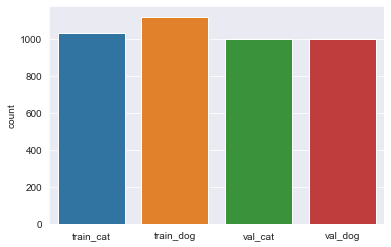

In [7]:
show_data(labels=labels, train=train, val=val, verbose=verbose)

Text(0.5, 1.0, 'dog')

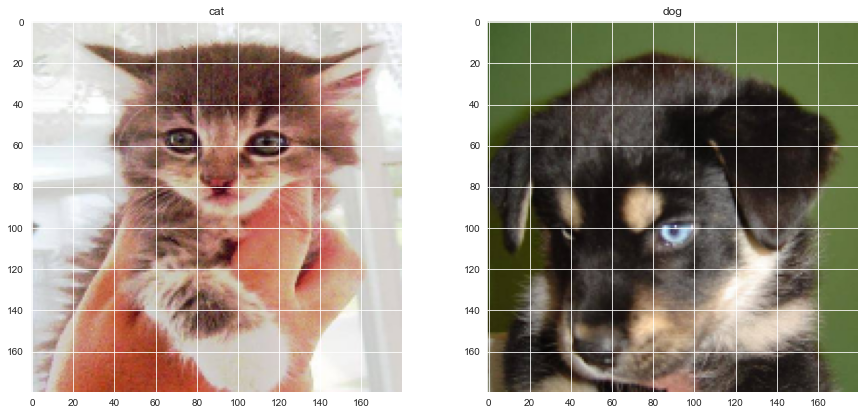

In [8]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

plt.subplot(2, 2, 2)
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

<div style="display: flex; background-color: Green; padding: 7px;" >

### Data Preprocessing and Data Augmentation
</div>

<div style="display: flex; background-color: indigo;" >

#### Standardisation
</div>

In [9]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, image_size[0], image_size[1], 1)
y_train = np.array(y_train)

x_val.reshape(-1, image_size[0], image_size[1], 1)
y_val = np.array(y_val)

<div style="display: flex; background-color: indigo;" >

#### Augmentation
</div>

In [10]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

<div style="display: flex; background-color: Green; padding: 7px;" >

### Define the Model
</div>

In [23]:
model = Sequential()
model.add(Conv2D(batch_size, 3,padding="same", activation="relu", input_shape=(image_size[0], image_size[1],3)))
model.add(MaxPool2D())

model.add(Conv2D(batch_size, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(batch_size*2, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(batch_size*4,activation="relu"))

if len(labels) == 2:
    activation = "sigmoid"
    units = 2
else:
    activation = "softmax"
    units = len(labels)

model.add(Dense(units, activation=activation))
# model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 22, 22, 64)      

In [24]:
opt = Adam(learning_rate=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [25]:
epochs = 5
history = model.fit(x_train,y_train,epochs = 5 , validation_data = (x_val, y_val))

Epoch 1/5
46/68 [===================>..........] - ETA: 12s - loss: 0.6912 - accuracy: 0.5279

<div style="display: flex; background-color: Green; padding: 7px;" >

### Evaluating the result
</div>

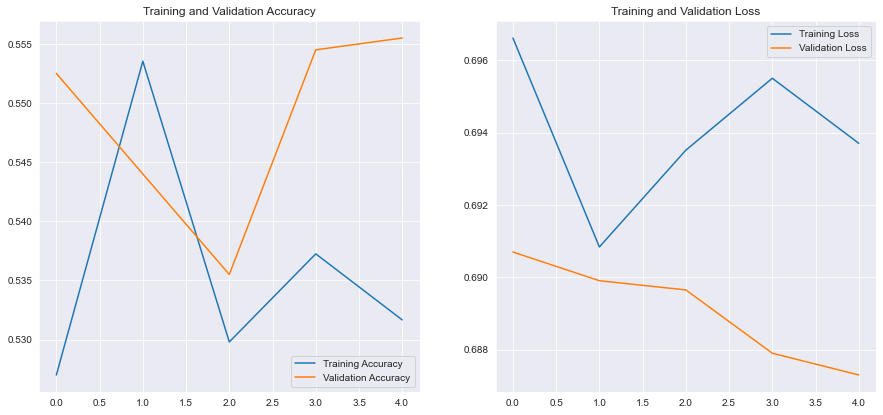

In [34]:
show_learning_graph(history=history, epochs=epochs, verbose=verbose)